In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
# Loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/carprices.csv')

In [4]:
# Inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [5]:
#Checking the number of rows and columns
car_dataset.shape

(13, 4)

In [6]:
# Getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [7]:
# Checking the number of missing values
car_dataset.isnull().sum()

,0
Car Model,0
Mileage,0
Sell Price($),0
Age(yrs),0


In [8]:
print(car_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes
None


In [10]:
car_dataset.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [11]:
car_dataset.tail()

,Car Model,Mileage,Sell Price($),Age(yrs)
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6
10,Mercedez Benz C class,83000,20000,7
11,Mercedez Benz C class,79000,21000,7
12,Mercedez Benz C class,59000,33000,5


In [12]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [13]:
car_dataset.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [14]:
car_dataset.isnull().sum()

,0
Car Model,0
Mileage,0
Sell Price($),0
Age(yrs),0


In [15]:
car_dataset.dropna()
car_dataset.fillna('NA')

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [17]:
car_dataset.drop(columns=['Mileage'])

,Car Model,Sell Price($),Age(yrs)
0,BMW X5,18000,6
1,BMW X5,34000,3
2,BMW X5,26100,5
3,BMW X5,40000,2
4,BMW X5,31500,4
5,Audi A5,29400,5
6,Audi A5,32000,5
7,Audi A5,19300,6
8,Audi A5,12000,8
9,Mercedez Benz C class,22000,6


In [18]:
car_dataset.shape

(13, 4)

In [20]:
car_dataset['Sell Price($)'].max()

40000

In [23]:
car_dataset['Sell Price($)'].min()

12000

In [25]:
car_dataset['Sell Price($)'].max()

40000

In [27]:
sorted(car_dataset['Sell Price($)'])

[12000,
 18000,
 19300,
 20000,
 21000,
 22000,
 26100,
 29400,
 31500,
 32000,
 33000,
 34000,
 40000]

In [29]:

# Loading the Linear Regression Model
lin_reg_model = LinearRegression()

In [36]:
X = car_dataset.drop(['Car Model','Sell Price($)'],axis=1)
Y = car_dataset['Sell Price($)']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 2)


In [38]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [40]:
# Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

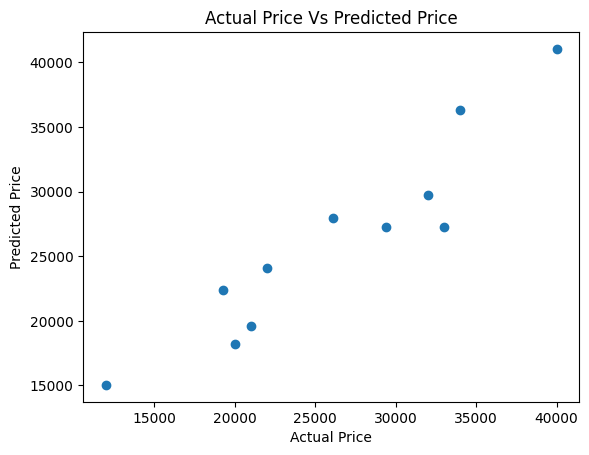

In [41]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

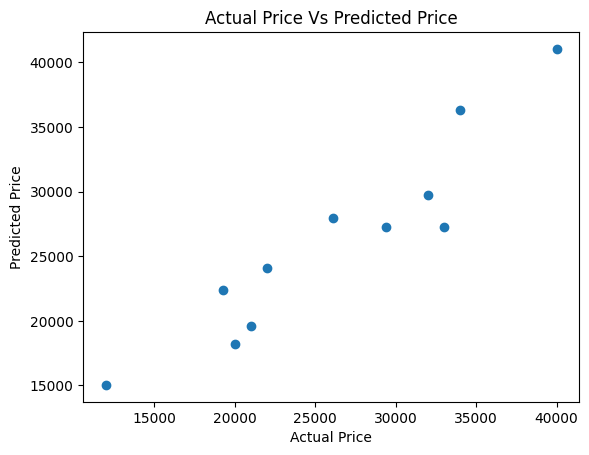

In [42]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

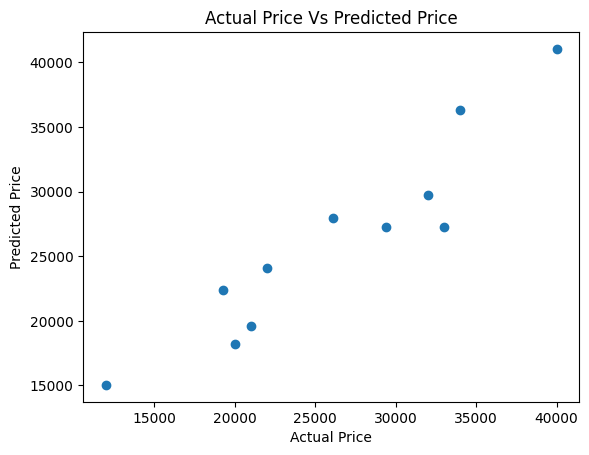

In [43]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()